<a href="https://colab.research.google.com/github/AlbinB/Text-Analytics-NLP/blob/main/1_2_4_%2BMaking%2BWordclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes


**We work with millions of news articles to show that our choices in a pipeline actually matter. **

Let’s have some fun. We’re going to work with the data for our economic indicators case-study: articles from a couple of publications: Business Insider (57k articles), The New York Times (252k articles), Politico (46k articles), and TMZ (49k articles). We want to understand how our data changes if we make different pre-processing choices. In other words, if we remove punctuation or put everything into letter case, does it actually matter?

*What if we don’t do any cleaning at all and just use the whole string.* What do we see? We don’t find anything useful because no sentence is frequently repeated. One of the cool things about language is that we have an infinite set of sentences that we could say. This means that two people are very unlikely to say the same sentence in different contexts. For example, according to Google the sentence in italics at the beginning of this paragraph has never been written before. Think about that: there are billions to trillions of web pages, articles, books, and tweets available online. But this sentence has NEVER been used. So if we don’t do any preparation in our pipeline, and work with raw strings, we don’t find anything interesting. Because each raw string is impossibly rare.

Our second pipeline splits the strings into words. Now we start to get something useful. But sometimes we see the same word multiple times: lowercase, uppercase, with punctuation. If you remember our chart of the most common words in English, there are 25 function words that account for about a quarter of everything we say. Here’s a wordcloud for articles in Business Insider. We see that the most common words are just these function words, as we expect. We also see that some words are so common that different forms appear in the wordcloud! For example, we have lowercase “the” and uppercase “The”. And we see a lot of different forms of “it”. So if we don’t do anything, we end up with punctuation and function words.

But here’s a wordcloud that removes function words (mostly). We still don’t take care of cleaning the text, so only lowercase function words are removed. Why? Because “the” and “The” are two different strings! We also see a lot of proper names here. In part, this is just because proper names like “European” are quite common. But it is also because these are always capitalized. So these words are less influenced by our cleaning methods.

Our third pipeline splits the string into words and makes everything lower case. But it doesn’t do any regular expression to remove emojis and urls and stuff that isn’t really linguistic. So the words are getting cleaned but not fully. Here we switch to the Business Insider. This figure shows our second pipeline (on the right) and our third pipeline (on the left). What a difference that makes! On the right we get a bunch of proper names again. But on the left we could general content terms that tell us about the publication’s focus.

Now our final pipeline does everything we’ve talked about. It splits the string into words, it makes everything the same case, and it takes care of punctuation. Here we’re looking at the previous pipeline (on the right) and our final pipeline (on the left). See the difference? This is clean and it starts to tell us something about the articles and publication we’re looking at. To see the difference each choice makes, look at this animation that shows each step together.

So let’s take this pipeline and see what we can learn over lots and lots of data. What is the big picture? We’ll just look at wordclouds here. But this whole course is showing you how to build much more powerful models. My question now is, how does our view of the world reflect what we read? On the left we have a wordcloud based on four years of articles in Politico. And on the right based on four years of articles in TMZ. Wow! On the left we have different parties debating and interviewing on topics like taxes and justice and the media. On the right a guy and some fans having incidents with their ex’s, playing video games, and making claims. One common factor on both sides: the word Trump.

 But these are different publications, right? So of course they focus on different stories. Let’s look at wordclouds from The New York Times over time: 2016 to 2019. What’s constant? We notice there’s a theme of people misspelling things on Twitter. But what’s changing? Proper names: New Zealand and Djokovic in 2016, Kim Jung Un in 2017, Ocasio and Wolfe in 2018, Sanders and Newsom in 2019. So over time in the same publication we see a reflection of what’s going on.

Why should we care? Well, the main point here is that little changes in our pipeline can have a big influence on the patterns we see. But the larger picture is that there is a lot of information in this data. A word cloud is just descriptive statistics, no models or machine learning. But we start to see larger patterns.


# Colab Setup

In [1]:
# if you are running these labs in CoLab, you will first need to mount the drive and 
# copy text_analitics.py to path 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
###Add text_analytics.py to path 
!cp "/content/drive/My Drive/Colab Notebooks/CourseWork/Text Analytics and Natural Language Processing/text_analytics.py" .
print("Done!")

Done!


# Lecture Lab

In this lab, we'll make wordclouds from the text we've cleaned. This will require bringing together a few tools that we've learned how to use. First, we will need to load a dataset. Second, we will need to clean a text. Third, we will need to convert that text into numbers (frequencies). And, finally, we will use those vectors to build a wordcloud.

Let's get started!

In [3]:
from text_analytics import text_analytics
import os
import pandas as pd

ai = text_analytics()
print("Done!")

Done!


In [5]:
file = "Wordclouds.Business_Insider.gz"
file = os.path.join(ai.data_dir, file)
df = pd.read_csv(file, index_col = 0)
print(df)

         index  ...                                               Text
0            1  ...   The Indianapolis Colts made Andrew Luck the h...
1           61  ...  There's a creed The Gunslinger lives by in "Th...
2           64  ...  Meteors have been seen falling in Fortnite: Ba...
3          106  ...  Jurors are now deciding the fate of a former T...
4          159  ...  Former Canadian diplomat Michael Kovrig has be...
...        ...  ...                                                ...
57948  2681343  ...  President Donald Trump on Tuesday essentially ...
57949  2681344  ...  Former Labor Secretary Robert Reich says the b...
57950  2681345  ...  Chicago Mayor Lori Lightfoot raised questions ...
57951  2681346  ...  Defense Secretary Mark Esper said the US Navy ...
57952  2681349  ...  This story is available exclusively on Busines...

[57953 rows x 5 columns]


So now we have the data in memory. Let's inspect a random article.

In [6]:
ai.print_sample(df)
print("Done!")

['The 2020 Hyundai Palisade family SUV made its world debut at the 2018 Los Angeles Auto Show. The new mid-size, three-row SUV is designed to take on the Ford Explorer, Toyota Highlander, Honda Pilot, Nissan Pathfinder, Subaru Ascent, and Volkswagen Atlas. The Palisade will be powered by a 3.8-liter, 291-horsepower V6 engine mated to an eight-speed automatic transmission. The 2020 Hyundai Palisade is set to reach showrooms in the summer of 2019 with a starting price estimated to be about $30,000. Hyundai\'s all-out assault on the US market continues with the introduction of its new flagship Palisade SUV on Wednesday at the Los Angeles Auto Show. The 2020 Hyundai Palisade, set to reach US showrooms in the summer of 2019, is the latest entrant in the hotly contested midsize, three-row family-SUV segment — an area of the market dominated by industry heavyweights such as the Ford Explorer, Toyota Highlander, Honda Pilot, and Nissan Pathfinder. Newcomers like the Volkswagen Atlas and Subaru

And now we'll make a wordcloud. Here we're calling the *text_analytics* package to do it for us. If you want to dig deeper, take a look at the *wordclouds* function that we're calling.

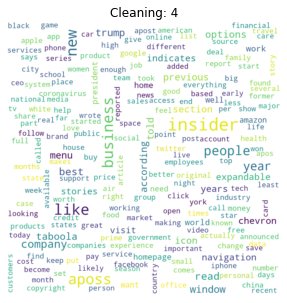

Done!


In [7]:
ai.wordclouds(df, stage = 4, features = "frequency")
print("Done!")

This takes a bit because we have to make the vocabulary and count each word. So be patient!

Try to play around with this a bit. Can you use *groupby* to make wordclouds for each year?

The function takes a *stage* parameter that controls how much pre-processing takes place. Here are the values you can use:

0 = just split into words

1 = remove stop words

2 = lowercase

3 = remove punctuation

4 = remove non-linguistic material

Have fun!

In [8]:
for year, year_df in df.groupby("Year"):
        print(year, ": ", len(year_df))

2016 :  3243
2017 :  2874
2018 :  2204
2019 :  33729
2020 :  15903


In [9]:
df_2016 = df.loc[df["Year"] == 2016]
df_2017 = df.loc[df["Year"] == 2017]
df_2018 = df.loc[df["Year"] == 2018]
df_2019 = df.loc[df["Year"] == 2019]
df_2020 = df.loc[df["Year"] == 2020]

# Practice

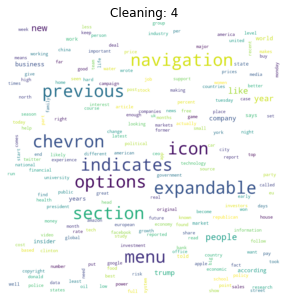

Done!


In [10]:
ai.wordclouds(df_2016, stage = 4, features = "frequency")
print("Done!")

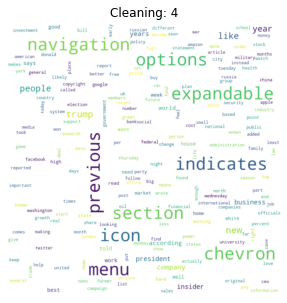

Done!


In [11]:
ai.wordclouds(df_2017, stage = 4, features = "frequency")
print("Done!")

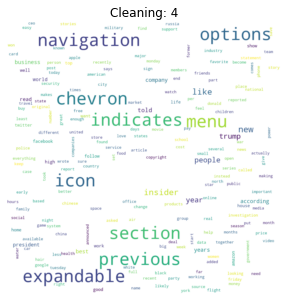

Done!


In [12]:
ai.wordclouds(df_2018, stage = 4, features = "frequency")
print("Done!")

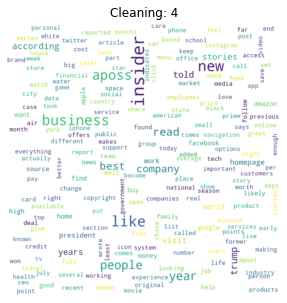

Done!


In [13]:
ai.wordclouds(df_2019, stage = 4, features = "frequency")
print("Done!")

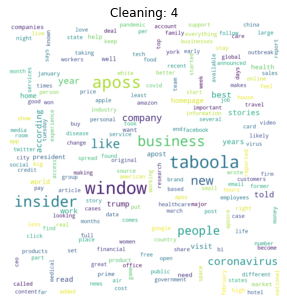

Done!


In [15]:
ai.wordclouds(df_2020, stage = 4, features = "frequency")
print("Done!")